In [7]:
import numpy as np
from optimizer.nesterov import Nesterov
from loss.LogLoss import LogLoss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].copy()
y = df['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age'] = pd.cut(
    X['Age'],
    bins=[0, 12, 18, 60, 120],
    labels=[0, 1, 2, 3]
).astype(int)
X['Embarked'] = X['Embarked'].fillna('S')  

X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

scaler = StandardScaler()
X[['SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['SibSp', 'Parch', 'Fare']])

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


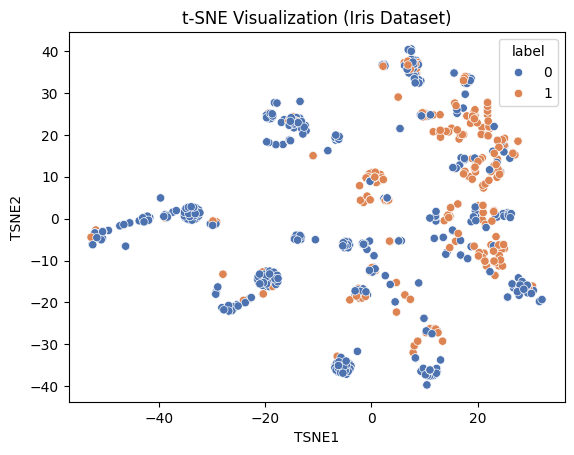

In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X.dropna(inplace=True)  # Ensure there are no NaN values
y = y[X.index]  # Align y with the cleaned X
X_embedded = tsne.fit_transform(X)

# Put results into a DataFrame for plotting
df2 = pd.DataFrame({
    'TSNE1': X_embedded[:, 0],
    'TSNE2': X_embedded[:, 1],
    'label': y
})

# Plot with Seaborn
sns.scatterplot(data=df2, x='TSNE1', y='TSNE2', hue='label', palette='deep')
plt.title("t-SNE Visualization (Iris Dataset)")
plt.show()

In [9]:
y[y == 0] = -1  
np.unique(y)

array([-1,  1])

<BarContainer object of 2 artists>

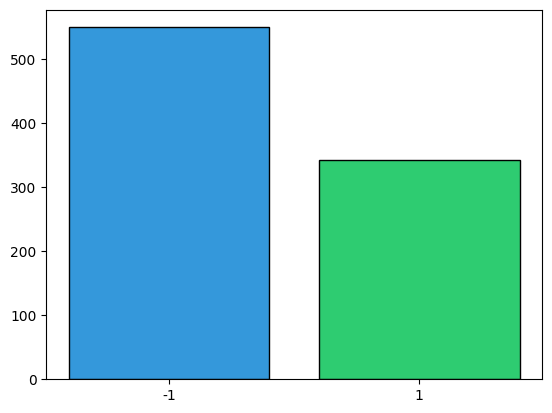

In [15]:
counts = y.value_counts()

plt.bar(counts.index.astype(str), counts.values, color=['#3498db', '#2ecc71'], edgecolor='black')


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

[-1  1]


(623,)

In [8]:
len(y_train)

623

In [9]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
from optimizer.nesterov import Nesterov
from optimizer.momentum import Momentum
from optimizer.sgd import SgdOptimizer
from loss.LogLoss import LogLoss
import numpy as np
from classifier.sgd_classifier import SGDClassifier
a = SGDClassifier(learning_rate=0.01, n_iterations= 1000, optimizer=Momentum(gamma=0.9), loss=LogLoss(), weight_init='multi', penalty=None, ordering ="margin-first", lambd=0.5, use_bias=True)


a.fit(X_train.to_numpy(), y_train)
result =a.predict(X_test)
TP=0
FN=0
FP=0
TN=0
for i in range(len(result)):
    if result[i]==1 and y_test[i]==1:
        TP+=1
    elif result[i]==1 and y_test[i]==-1:
        FP+=1
    elif result[i]==-1 and y_test[i]==1:
        FN+=1
    elif result[i]==-1 and y_test[i]==-1:
        TN+=1
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy:", accuracy)

confusion_matrix = np.array([[TP, FP], [FN, TN]])
print("Confusion Matrix:\n", confusion_matrix)

print(a.losses)

    


(623, 8)
Iter 0: loss=0.7970, |w|=1.0335
(623, 8)
Iter 0: loss=0.7597, |w|=1.0205
(623, 8)
Iter 0: loss=0.7595, |w|=1.0288
(623, 8)
Iter 0: loss=0.7505, |w|=1.0745
(623, 8)
Iter 0: loss=0.8108, |w|=1.1263
(623, 8)
Iter 0: loss=0.7749, |w|=1.0828
(623, 8)
Iter 0: loss=0.7581, |w|=1.0444
(623, 8)
Iter 0: loss=0.7649, |w|=1.0318
(623, 8)
Iter 0: loss=0.7649, |w|=1.0599
(623, 8)
Iter 0: loss=0.7615, |w|=1.0407
(8,)
(623, 8)

Iter 0: loss=0.6580, |w|=2.5183










Iter 10: loss=0.6745, |w|=2.9828










Iter 20: loss=0.6748, |w|=3.1116










Iter 30: loss=0.6722, |w|=3.1728










Iter 40: loss=0.6740, |w|=3.2017










Iter 50: loss=0.6743, |w|=3.2160










Iter 60: loss=0.6754, |w|=3.2459










Iter 70: loss=0.6742, |w|=3.2525










Iter 80: loss=0.6761, |w|=3.2611










Iter 90: loss=0.6736, |w|=3.2791










Iter 100: loss=0.6736, |w|=3.2695










Iter 110: loss=0.6807, |w|=3.2268










Iter 120: loss=0.6739, |w|=3.2619










Iter 130: loss

In [ ]:
for ordering in ('random', 'margin-first'):
    for weight_init in ('random', 'multi', 'correlation'):
        for optimizer_class in (Nesterov, SgdOptimizer, Momentum):
            a = SGDClassifier(
                learning_rate=0.01,
                n_iterations=1000,
                optimizer=optimizer_class(gamma=0.9),
                loss=LogLoss(),
                weight_init=weight_init,
                penalty="l2",
                ordering=ordering,
                lambd=0.5,
                use_bias=True
            )
            
            a.fit(X_train.to_numpy(), y_train)
            result = a.predict(X_test)

            # Рисуем график
            plt.figure(figsize=(6, 4))
            plt.plot(a.losses)
            plt.title(f"{optimizer_class.__name__} | init={weight_init} | order={ordering}")
            plt.xlabel("Iteration")
            plt.ylabel("Loss")

            # Сохраняем
            filename = f"loss_{optimizer_class.__name__}_{weight_init}_{ordering}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            plt.close()

(623, 8)
Iter 0: loss=0.7585, |w|=0.9995
Iter 10: loss=0.6534, |w|=3.0553
Iter 20: loss=0.6576, |w|=3.4318
Iter 30: loss=0.6488, |w|=3.5847
Iter 40: loss=0.6510, |w|=3.6842
Iter 50: loss=0.6490, |w|=3.7350
Iter 60: loss=0.6475, |w|=3.7508
Iter 70: loss=0.6480, |w|=3.8079
Iter 80: loss=0.6480, |w|=3.8499
Iter 90: loss=0.6486, |w|=3.8673
Iter 100: loss=0.6492, |w|=3.8542
Iter 110: loss=0.6540, |w|=3.8721
Iter 120: loss=0.6506, |w|=3.8424
Iter 130: loss=0.6510, |w|=3.8925
Iter 140: loss=0.6490, |w|=3.8699
Iter 150: loss=0.6575, |w|=3.8712
Iter 160: loss=0.6498, |w|=3.8344
Iter 170: loss=0.6476, |w|=3.8364
Iter 180: loss=0.6596, |w|=3.8729
Iter 190: loss=0.6492, |w|=3.8494
Iter 200: loss=0.6644, |w|=3.8830
Iter 210: loss=0.6507, |w|=3.8994
Iter 220: loss=0.6519, |w|=3.9298
Iter 230: loss=0.6489, |w|=3.8556
Iter 240: loss=0.6487, |w|=3.8717
Iter 250: loss=0.6501, |w|=3.8460
Iter 260: loss=0.6512, |w|=3.9002
Iter 270: loss=0.6478, |w|=3.8470
Iter 280: loss=0.6531, |w|=3.8656
Iter 290: loss=0

[-1  1] int64


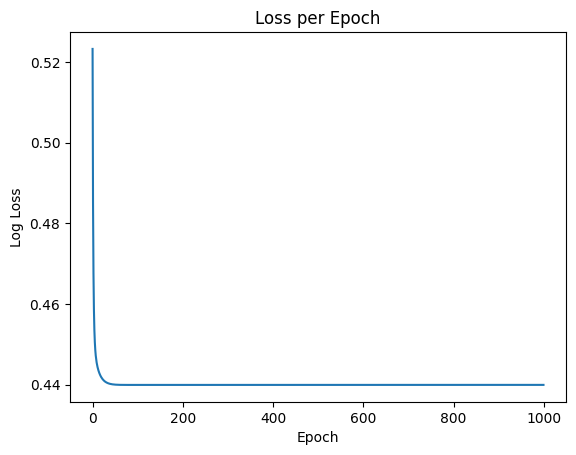

/Users/y.y.rudyk/projects/fall-2025/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [62]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, hinge_loss
print(np.unique(y), y.dtype)
clf = SGDClassifier(
    loss='log_loss',      
    learning_rate='constant',
    eta0=0.01,
    penalty='l2',
    random_state=42,
    warm_start=True  
)

loss_history = []

# Train for multiple epochs
for epoch in range(1000):
    clf.partial_fit(X, y, classes=np.unique(y))
    # Compute average log loss on the training set
    y_pred_proba = clf.predict_proba(X)
    current_loss = log_loss(y, y_pred_proba)
    # Log loss formula manually since sklearn SGD may not store it
    loss_history.append(current_loss)

# Plot
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Loss per Epoch")
plt.show()
result_sklearn = clf.predict(X_test)




In [1]:
TP=0
FN=0
FP=0
TN=0
for i in range(len(result)):
    if result[i]==1 and y_test[i]==1:
        TP+=1
    elif result[i]==1 and y_test[i]==-1:
        FP+=1
    elif result[i]==-1 and y_test[i]==1:
        FN+=1
    elif result[i]==-1 and y_test[i]==-1:
        TN+=1
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy:", accuracy)
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print("Confusion Matrix:\n", confusion_matrix)


NameError: name 'result' is not defined

In [63]:
TP=0
FN=0
FP=0
TN=0
for i in range(len(result_sklearn)):
    if result_sklearn[i]==1 and y_test[i]==1:
        TP+=1
    elif result_sklearn[i]==1 and y_test[i]==-1:
        FP+=1
    elif result_sklearn[i]==-1 and y_test[i]==1:
        FN+=1
    elif result_sklearn[i]==-1 and y_test[i]==-1:
        TN+=1
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy:", accuracy)
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print("Confusion Matrix:\n", confusion_matrix)

Accuracy: 0.7910447761194029
Confusion Matrix:
 [[ 79  24]
 [ 32 133]]


In [34]:
X_test = X_test[:, :-1]

In [27]:
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


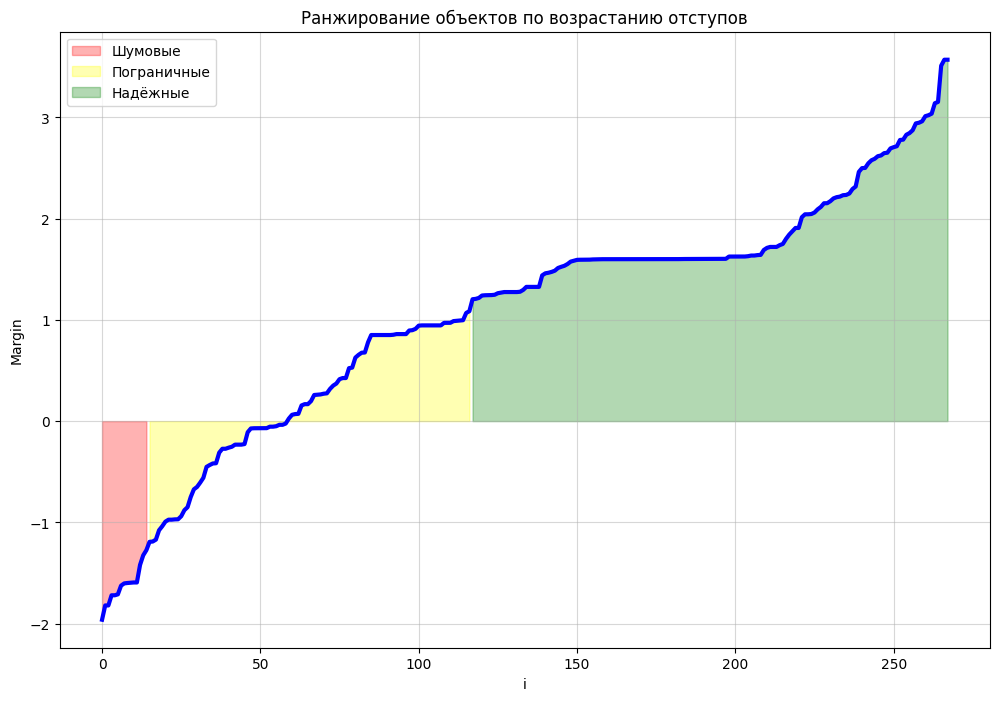

In [41]:
X_test_2 = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
margins = y_test * (X_test_2 @ a.weights)
sorted_margins = margins[np.argsort(margins)]

plt.figure(figsize=(12, 8))
plt.plot(range(len(sorted_margins)), sorted_margins, 'b-', linewidth=3)

n_points = len(sorted_margins)
x_range = np.arange(n_points)

threshold = 1.2
noisy = sorted_margins < -threshold  
borderline = (sorted_margins >= -threshold) & (sorted_margins <= threshold)
reliable = sorted_margins > threshold
plt.fill_between(x_range[noisy], sorted_margins[noisy], 0, 
                     color='red', alpha=0.3, label='Шумовые')
plt.fill_between(x_range[borderline], sorted_margins[borderline], 0, 
                     color='yellow', alpha=0.3, label='Пограничные')
plt.fill_between(x_range[reliable], sorted_margins[reliable], 0, 
                     color='green', alpha=0.3, label='Надёжные') 


plt.xlabel('i')
plt.ylabel('Margin')
plt.title('Ранжирование объектов по возрастанию отступов')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()